In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Step 1: Understand the Dataset

In [2]:
df=pd.read_excel("Mobile Sales Data.xlsx")
df.head()

,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9


# Step 2: Data Preprocessing

In [3]:
df.shape

(3835, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    3835 non-null   int64  
 1   Day               3835 non-null   int64  
 2   Month             3835 non-null   int64  
 3   Year              3835 non-null   int64  
 4   Day Name          3835 non-null   object 
 5   Brand             3835 non-null   object 
 6   Units Sold        3835 non-null   int64  
 7   Price Per Unit    3835 non-null   float64
 8   Customer Name     3835 non-null   object 
 9   Customer Age      3835 non-null   int64  
 10  City              3835 non-null   object 
 11  Payment Method    3835 non-null   object 
 12  Customer Ratings  3835 non-null   int64  
 13  Mobile Model      3835 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 419.6+ KB


In [5]:
df.isna().sum()

Transaction ID      0
Day                 0
Month               0
Year                0
Day Name            0
Brand               0
Units Sold          0
Price Per Unit      0
Customer Name       0
Customer Age        0
City                0
Payment Method      0
Customer Ratings    0
Mobile Model        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Day Name'].unique()

array(['Sat', 'Saturday', 'Sunday', 'Sun', 'Monday', 'Mon', 'Tuesday',
       'Wed', 'Wednesday', 'Thursday', 'Thu', 'Friday', 'Fri', 'Tue'],
      dtype=object)

In [8]:
df['Day Name']=df['Day Name'].replace({
    "Sat":"Saturday",
    "Sun":"Sunday",
    "Mon":"Monday",
    "Wed":"Wednesday",
    "Thu":"Thursday",
    "Fri":"Friday",
    "Tue":"Tuesday"
})

In [9]:
print("no.of uniques:",len(df['Day Name'].unique()))
df['Day Name'].unique()

no.of uniques: 7


array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [10]:
df['Month'].unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [11]:
df['Month_Name'] = pd.to_datetime(df['Month'], format='%m').dt.month_name()
df['Month_Name'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September'],
      dtype=object)

In [12]:
print("no.of uniques:",len(df['Brand'].unique()))
df['Brand'].unique()

no.of uniques: 5


array(['Xiaomi', 'Vivo', 'OnePlus', 'Samsung', 'Apple'], dtype=object)

In [13]:
print("no.of uniques:",len(df['City'].unique()))
df['City'].unique()

no.of uniques: 19


array(['Ludhiana', 'Delhi', 'Mumbai', 'Gorakhpur', 'Jodhpur', 'Vadodara',
       'Madurai', 'Hyderabad', 'Chennai', 'Coimbatore', 'Kolkata',
       'Rajkot', 'Kanpur', 'Bhopal', 'Ranchi', 'Lucknow', 'Indore',
       'Patna', 'Bangalore'], dtype=object)

In [14]:
print("no.of uniques:",len(df['Payment Method'].unique()))
df['Payment Method'].unique()

no.of uniques: 4


array(['UPI', 'Credit Card', 'Cash', 'Debit Card'], dtype=object)

In [15]:
print("no.of uniques:",len(df['Mobile Model'].unique()))
df['Mobile Model'].unique()

no.of uniques: 15


array(['Redmi Note 10', 'Vivo Y51', 'Vivo S1', 'Mi 11', 'OnePlus 9',
       'Galaxy Note 20', 'OnePlus Nord', 'iPhone 12', 'Galaxy A51',
       'Vivo V20', 'Redmi 9', 'iPhone SE', 'Galaxy S21', 'OnePlus 8T',
       'iPhone 11'], dtype=object)

In [16]:
df['Customer Ratings'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [17]:
df['Total_sales']=df['Units Sold']*df['Price Per Unit']

In [18]:
df.head()

,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model,Month_Name,Total_sales
0,1,9,10,2021,Saturday,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10,October,61048.20
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51,October,63391.14
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1,October,468220.64
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11,October,127819.90
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9,October,144504.06


In [19]:
df.describe()

,Transaction ID,Day,Month,Year,Units Sold,Price Per Unit,Customer Age,Customer Ratings,Total_sales
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,1918.000000,15.703781,6.527249,2022.765319,4.993481,40114.036816,38.098305,3.693090,200574.964269
std,1107.213469,8.822771,3.452030,0.917401,2.581122,17310.488427,12.110622,1.325069,142402.093904
min,1.000000,1.000000,1.000000,2021.000000,1.000000,10011.110000,18.000000,1.000000,10115.910000
25%,959.500000,8.000000,4.000000,2022.000000,3.000000,25617.405000,27.500000,3.000000,83930.940000
50%,1918.000000,16.000000,7.000000,2023.000000,5.000000,40136.490000,38.000000,4.000000,163855.840000
75%,2876.500000,23.000000,10.000000,2024.000000,7.000000,54973.475000,49.000000,5.000000,289246.935000
max,3835.000000,31.000000,12.000000,2024.000000,9.000000,69984.480000,59.000000,5.000000,628391.790000


# Prepare the Data for Time Analysis

In [20]:
df['Date'] = pd.to_datetime(df[['Day', 'Month', 'Year']])
df['Date'].head()

0   2021-10-09
1   2021-10-09
2   2021-10-09
3   2021-10-10
4   2021-10-10
Name: Date, dtype: datetime64[ns]

In [21]:
df = df.sort_values(by='Date')

In [22]:
df['Date'].head()

0   2021-10-09
1   2021-10-09
2   2021-10-09
3   2021-10-10
4   2021-10-10
Name: Date, dtype: datetime64[ns]

# Step 3: Exploratory Data Analysis (EDA)

##  Task 1 : Sales Trends Analysis

In [23]:
year_sales=df.groupby('Year')['Total_sales'].sum()
year_sales.sort_values(ascending=False)

Year
2022    2.619898e+08
2023    2.533142e+08
2024    1.950854e+08
2021    5.881552e+07
Name: Total_sales, dtype: float64

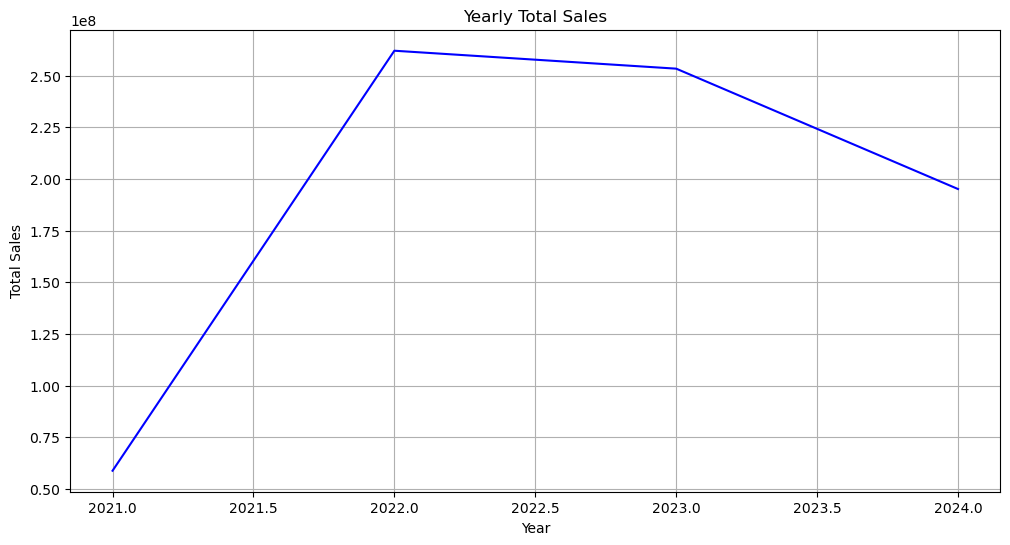

In [83]:
year_sales.plot(figsize=(12, 6), title="Yearly Total Sales", xlabel="Year", ylabel="Total Sales", color="blue")
plt.grid()
plt.show()

In [24]:
monthly_sales=df.groupby('Month_Name')['Total_sales'].sum()
monthly_sales.sort_values(ascending=False)

Month_Name
July         69644083.21
March        68971956.41
January      68281301.20
May          68119487.51
October      64740720.03
December     64180186.64
November     63752241.60
April        62464152.69
June         61816231.91
August       61564989.02
February     58769665.48
September    56899972.27
Name: Total_sales, dtype: float64

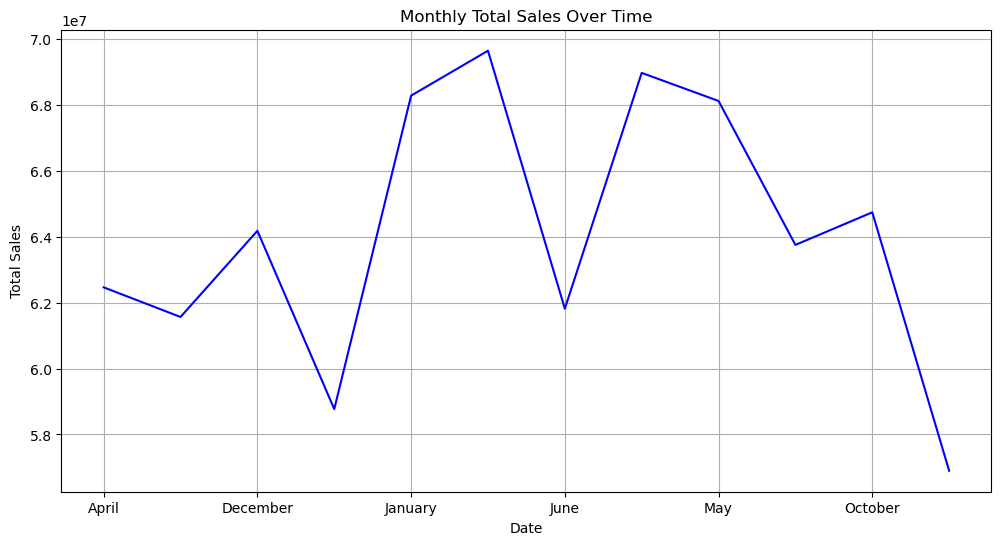

In [33]:
monthly_sales.plot(figsize=(12, 6), title="Monthly Total Sales Over Time", xlabel="Date", ylabel="Total Sales", color="blue")
plt.grid()
plt.show()


In [27]:
daily_sales=df.groupby('Day')['Total_sales'].sum()
daily_sales.sort_values(ascending=False)

Day
20    28566792.63
11    27644573.89
2     27565422.78
13    26475343.54
6     26323209.37
12    26184127.23
17    26179038.19
15    26046752.59
22    25915428.37
21    25842020.13
9     25813811.06
1     25782122.00
14    25673382.92
3     25572078.96
24    25425166.75
23    25159572.07
10    25028363.77
19    24957431.54
8     24905633.32
4     24710535.03
5     24260650.49
16    24206997.76
29    24179419.20
7     24000919.88
18    23787179.51
30    23444683.97
27    23297968.33
26    22703341.20
28    22117648.48
25    20688036.14
31    16747336.87
Name: Total_sales, dtype: float64

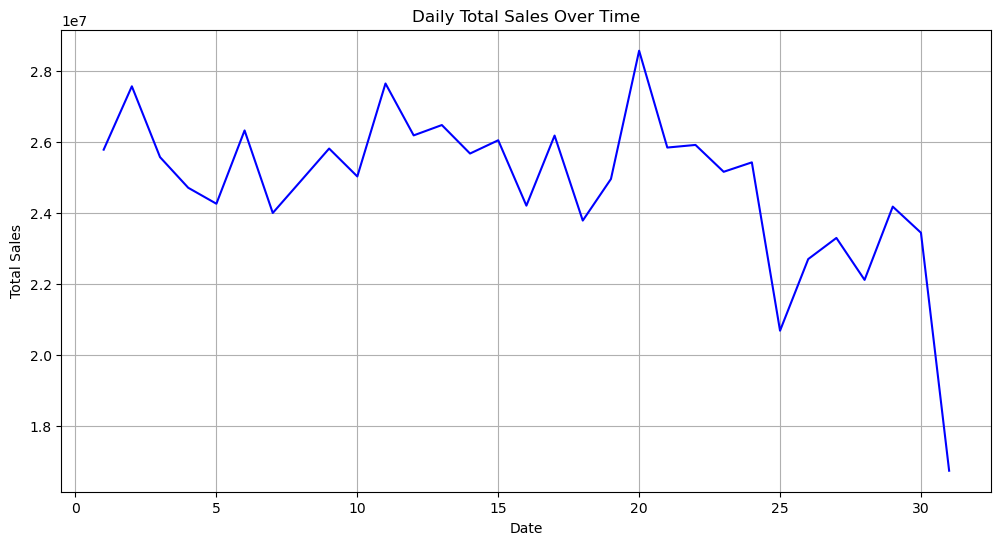

In [29]:
daily_sales.plot(figsize=(12, 6), title="Daily Total Sales Over Time", xlabel="Date", ylabel="Total Sales", color="blue")
plt.grid()
plt.show()


In [36]:
weekly_sales = df.groupby('Day Name')['Total_sales'].sum()
weekly_sales = weekly_sales[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [37]:
weekly_sales

Day Name
Monday       1.135434e+08
Tuesday      1.095668e+08
Wednesday    1.049147e+08
Thursday     1.067242e+08
Friday       1.117503e+08
Saturday     1.146219e+08
Sunday       1.080838e+08
Name: Total_sales, dtype: float64

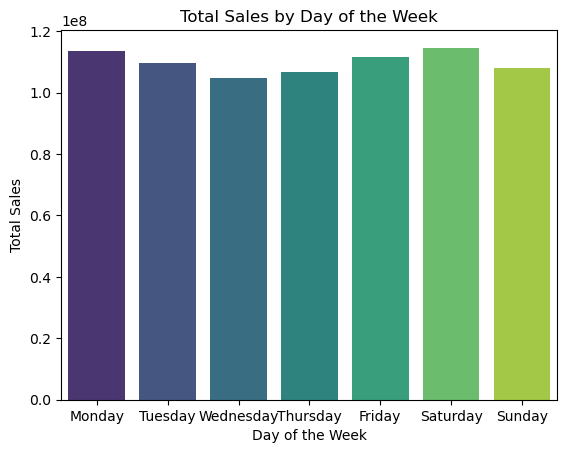

In [38]:
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette="viridis")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()


## Task 2 : Customer Demographics:

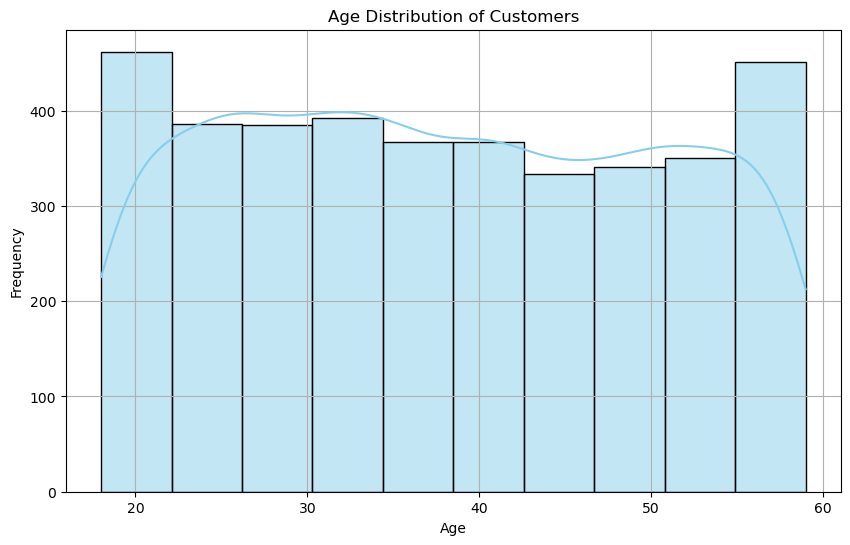

In [40]:
# Plot Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

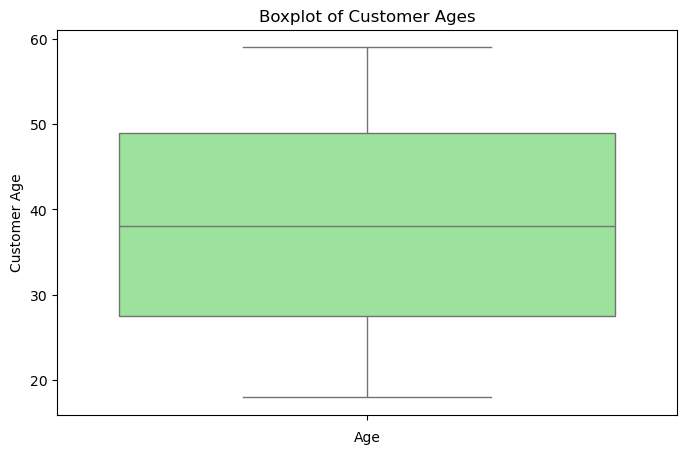

In [41]:
# Plot Boxplot for Age Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(df['Customer Age'], color='lightgreen')
plt.title("Boxplot of Customer Ages")
plt.xlabel("Age")
plt.show()

### Identify the Most Frequent Buyers

In [44]:
# Count Purchases by Customer
customer_counts = df['Customer Name'].value_counts()
customer_counts

Customer Name
Prashant Gupta         12
Manoj Jain             11
Priya Varma            10
Nikhil Solanki         10
Lata Shah              10
                       ..
Monika Singh            1
Sachin Chaudhary        1
Prashant Srivastava     1
Anita Patel             1
Anand Rao               1
Name: count, Length: 988, dtype: int64

In [45]:
# Display Top 10 Buyers
top_buyers = customer_counts.head(10)
print("Top 10 Most Frequent Buyers:")
print(top_buyers)

Top 10 Most Frequent Buyers:
Customer Name
Prashant Gupta    12
Manoj Jain        11
Priya Varma       10
Nikhil Solanki    10
Lata Shah         10
Sumit Malhotra    10
Pooja Arora        9
Pankaj Shah        9
Meena Mathur       9
Vijay Varma        9
Name: count, dtype: int64


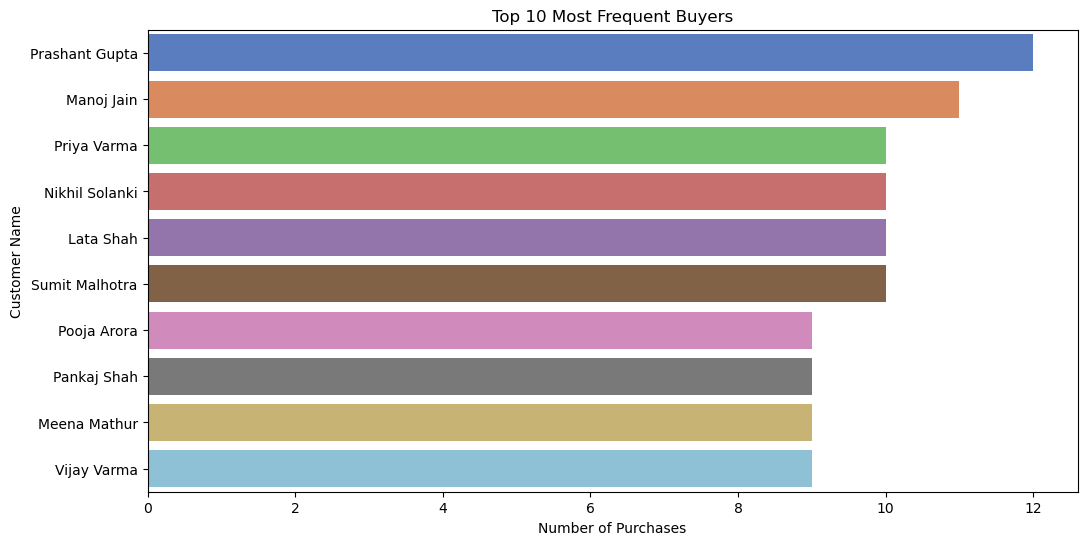

In [46]:
# Plot Top 10 Buyers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_buyers.values, y=top_buyers.index, palette='muted')
plt.title("Top 10 Most Frequent Buyers")
plt.xlabel("Number of Purchases")
plt.ylabel("Customer Name")
plt.show()

# Task 3 : Brand Popularity

## Analyze Total Units Sold by Brand

In [48]:
# Group by Brand and Sum Units Sold
units_sold_by_brand = df.groupby('Brand')['Units Sold'].sum().sort_values(ascending=False)
units_sold_by_brand

Brand
Apple      3932
Samsung    3923
OnePlus    3830
Vivo       3801
Xiaomi     3664
Name: Units Sold, dtype: int64

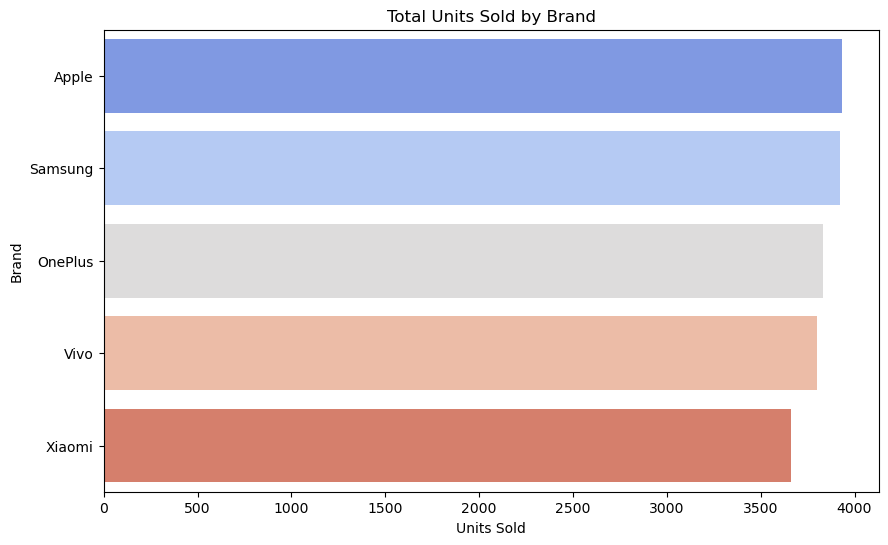

In [49]:
# Plot Total Units Sold by Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=units_sold_by_brand.values, y=units_sold_by_brand.index, palette='coolwarm')
plt.title("Total Units Sold by Brand")
plt.xlabel("Units Sold")
plt.ylabel("Brand")
plt.show()

## Analyze Total Revenue by Brand

In [51]:
# Group by Brand and Calculate Total Revenue
revenue_by_brand = df.groupby('Brand')['Total_sales'].sum().sort_values(ascending=False)
revenue_by_brand

Brand
Apple      1.616157e+08
Samsung    1.600381e+08
OnePlus    1.537194e+08
Vivo       1.500784e+08
Xiaomi     1.437533e+08
Name: Total_sales, dtype: float64

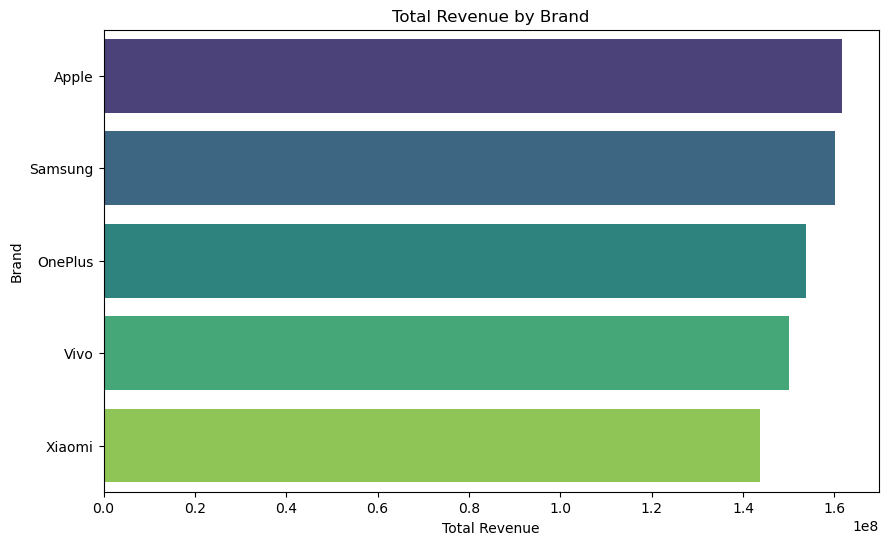

In [52]:
# Plot Total Revenue by Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_brand.values, y=revenue_by_brand.index, palette='viridis')
plt.title("Total Revenue by Brand")
plt.xlabel("Total Revenue")
plt.ylabel("Brand")
plt.show()

# Task 3 : Payment Methods

## Analyze Frequency of Payment Methods

In [55]:
# Count Transactions by Payment Method
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts

Payment Method
UPI            1011
Debit Card      948
Credit Card     947
Cash            929
Name: count, dtype: int64

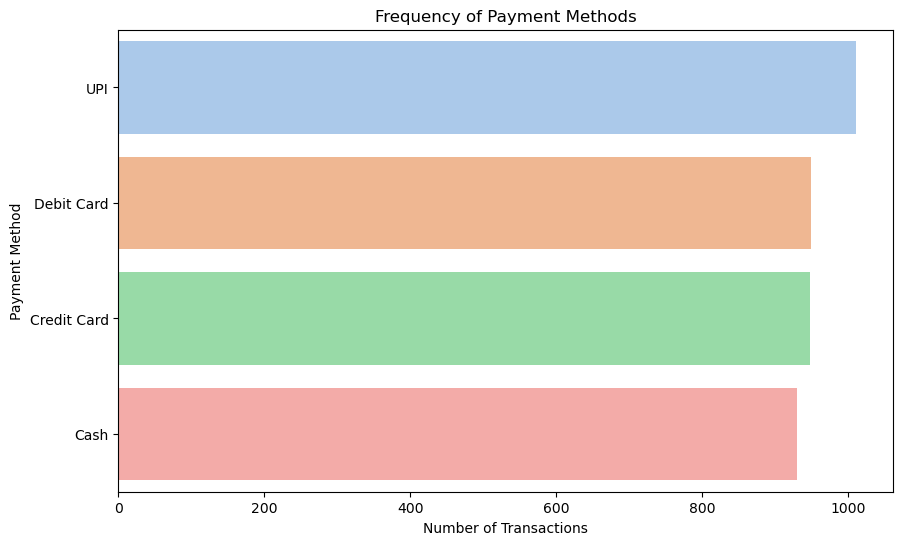

In [56]:
# Plot Frequency of Payment Methods
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index, palette='pastel')
plt.title("Frequency of Payment Methods")
plt.xlabel("Number of Transactions")
plt.ylabel("Payment Method")
plt.show()

## Analyze Revenue by Payment Method

In [58]:
# Group by Payment Method and Calculate Total Revenue
revenue_by_payment = df.groupby('Payment Method')['Total_sales'].sum().sort_values(ascending=False)
revenue_by_payment

Payment Method
UPI            2.016738e+08
Debit Card     1.957388e+08
Credit Card    1.866985e+08
Cash           1.850940e+08
Name: Total_sales, dtype: float64

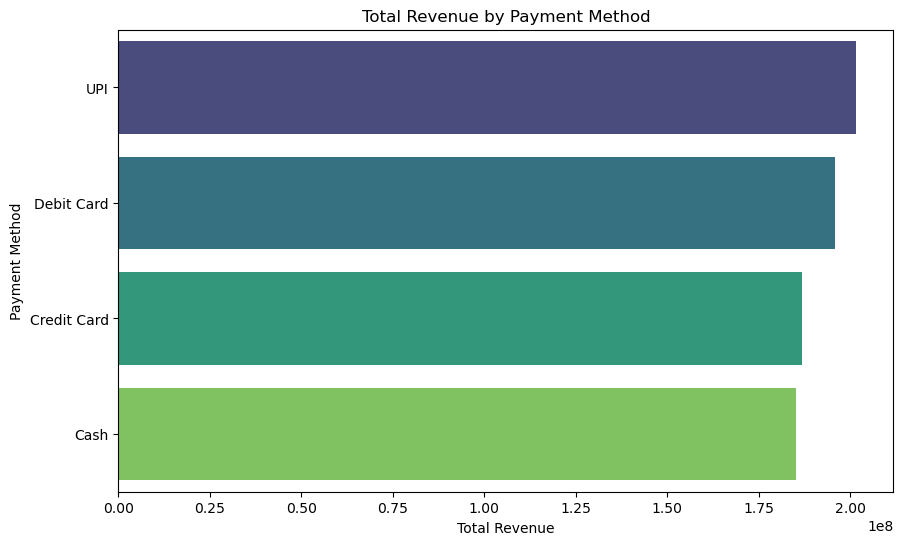

In [59]:
# Plot Revenue by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_payment.values, y=revenue_by_payment.index, palette='viridis')
plt.title("Total Revenue by Payment Method")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Method")
plt.show()

# Task 4: Customer Feedback

## Analyze Customer Ratings

In [85]:
# Summary Statistics for Customer Ratings
rating_stats = df['Customer Ratings'].describe()
print("Summary Statistics for Customer Ratings:")
print(rating_stats)

Summary Statistics for Customer Ratings:
count    3835.000000
mean        3.693090
std         1.325069
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Customer Ratings, dtype: float64


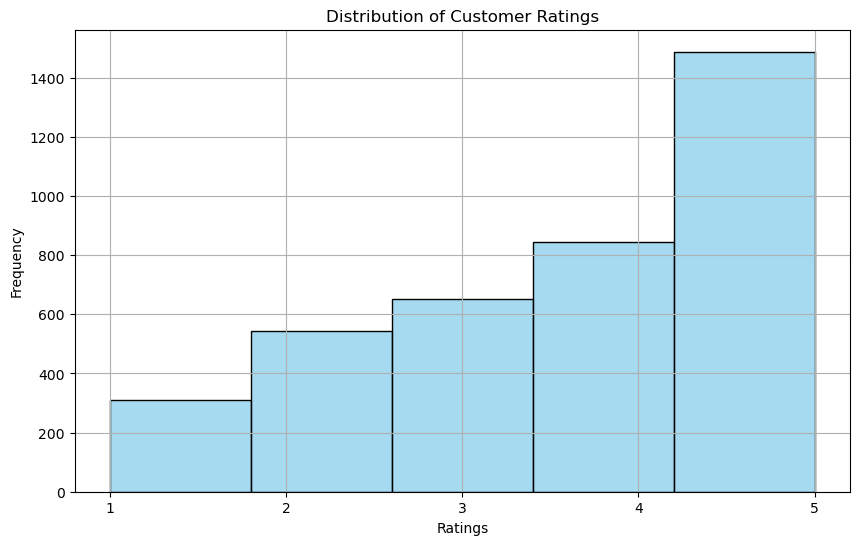

In [63]:
# Plot Distribution of Customer Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Ratings'], bins=5, kde=False, color='skyblue')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))  # Ratings typically range from 1 to 5
plt.grid()
plt.show()

## Analyze Ratings by Brand

In [65]:
# Average Ratings by Brand
avg_ratings_by_brand = df.groupby('Brand')['Customer Ratings'].mean().sort_values(ascending=False)
avg_ratings_by_brand

Brand
Xiaomi     3.722746
Apple      3.707535
Samsung    3.704516
OnePlus    3.682292
Vivo       3.648825
Name: Customer Ratings, dtype: float64

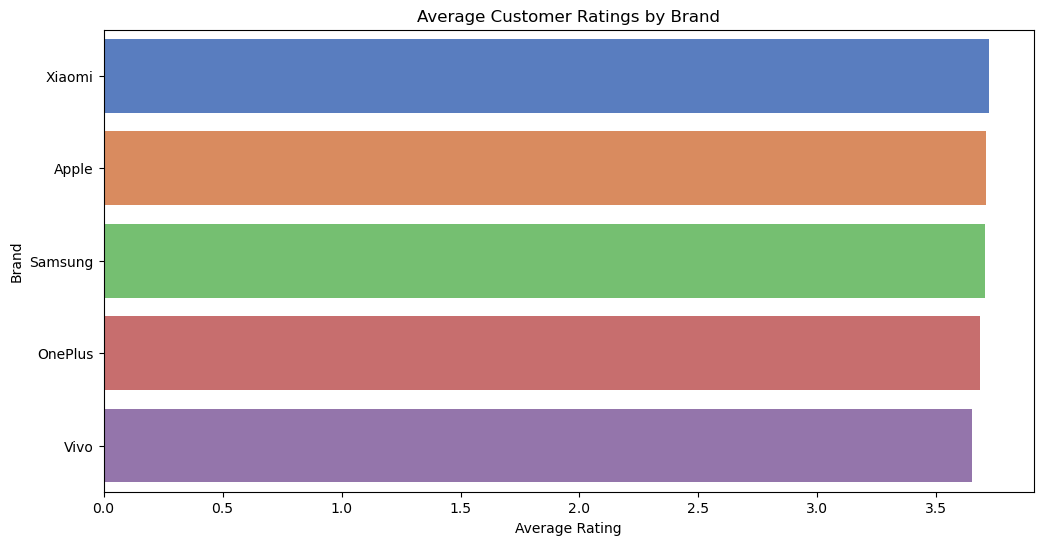

In [66]:
# Plot Average Ratings by Brand
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings_by_brand.values, y=avg_ratings_by_brand.index, palette='muted')
plt.title("Average Customer Ratings by Brand")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()

## Ratings vs. Payment Method

In [68]:
# Average Ratings by Payment Method
avg_ratings_by_payment = df.groupby('Payment Method')['Customer Ratings'].mean().sort_values(ascending=False)
avg_ratings_by_payment

Payment Method
Debit Card     3.727848
UPI            3.684471
Cash           3.682454
Credit Card    3.677930
Name: Customer Ratings, dtype: float64

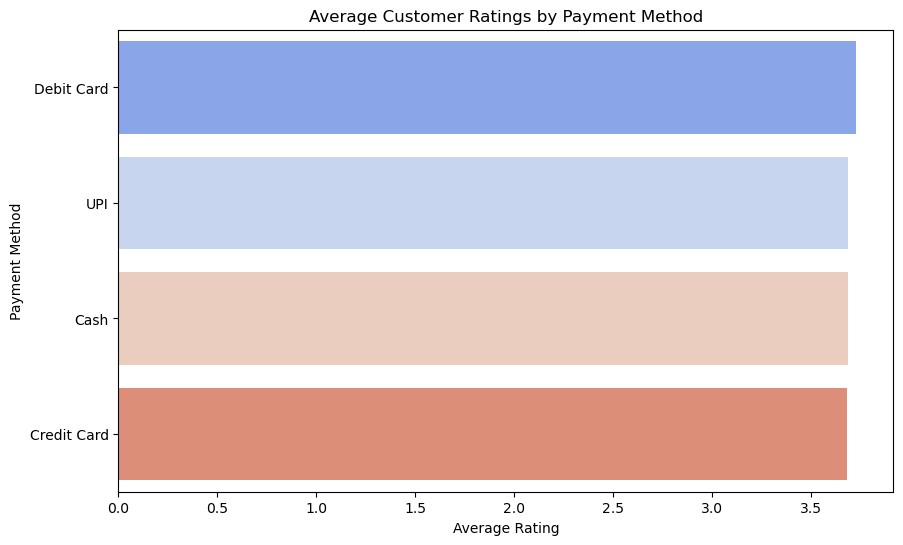

In [69]:
# Plot Average Ratings by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings_by_payment.values, y=avg_ratings_by_payment.index, palette='coolwarm')
plt.title("Average Customer Ratings by Payment Method")
plt.xlabel("Average Rating")
plt.ylabel("Payment Method")
plt.show()

# Task 5 : Geographic Insights

## Analyze Sales by City

In [71]:
# Total Sales by City
sales_by_city = df.groupby('City')['Total_sales'].sum().sort_values(ascending=False)
sales_by_city

City
Delhi         2.038835e+08
Mumbai        1.271913e+08
Ranchi        3.101877e+07
Chennai       3.075953e+07
Rajkot        2.732670e+07
Jodhpur       2.717294e+07
Bangalore     2.699495e+07
Lucknow       2.684379e+07
Madurai       2.667426e+07
Gorakhpur     2.566316e+07
Indore        2.551541e+07
Coimbatore    2.485563e+07
Bhopal        2.458103e+07
Hyderabad     2.450075e+07
Patna         2.368630e+07
Ludhiana      2.345286e+07
Kanpur        2.316730e+07
Kolkata       2.312863e+07
Vadodara      2.278823e+07
Name: Total_sales, dtype: float64

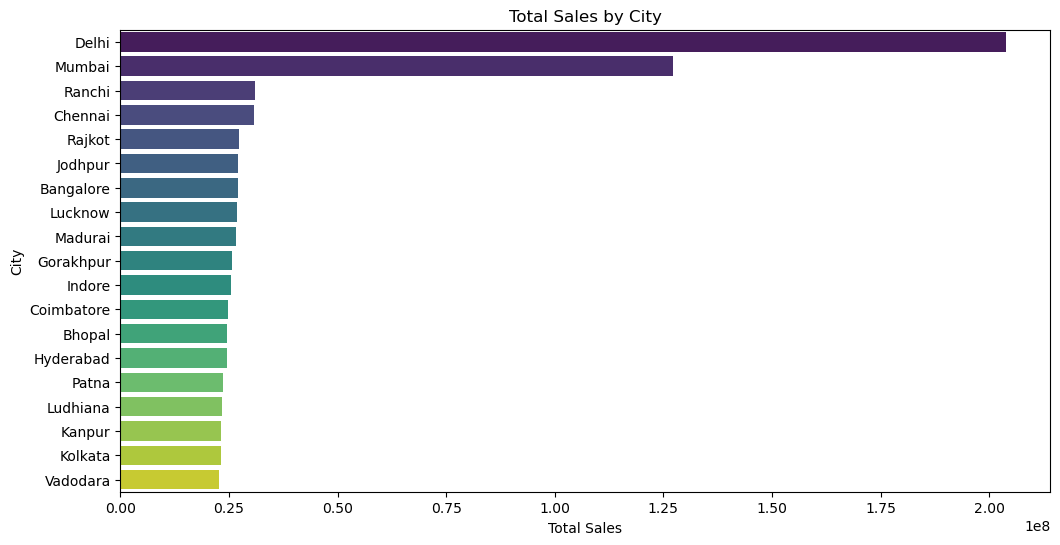

In [72]:
# Plot Total Sales by City
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_city.values, y=sales_by_city.index, palette='viridis')
plt.title("Total Sales by City")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()

## Analyze Units Sold by City

In [74]:
# Units Sold by City
units_by_city = df.groupby('City')['Units Sold'].sum().sort_values(ascending=False)
units_by_city

City
Delhi         5078
Mumbai        3207
Ranchi         761
Chennai        715
Jodhpur        677
Lucknow        673
Indore         655
Gorakhpur      653
Bangalore      651
Rajkot         643
Hyderabad      636
Bhopal         634
Madurai        633
Coimbatore     611
Ludhiana       608
Kolkata        597
Kanpur         589
Vadodara       574
Patna          555
Name: Units Sold, dtype: int64

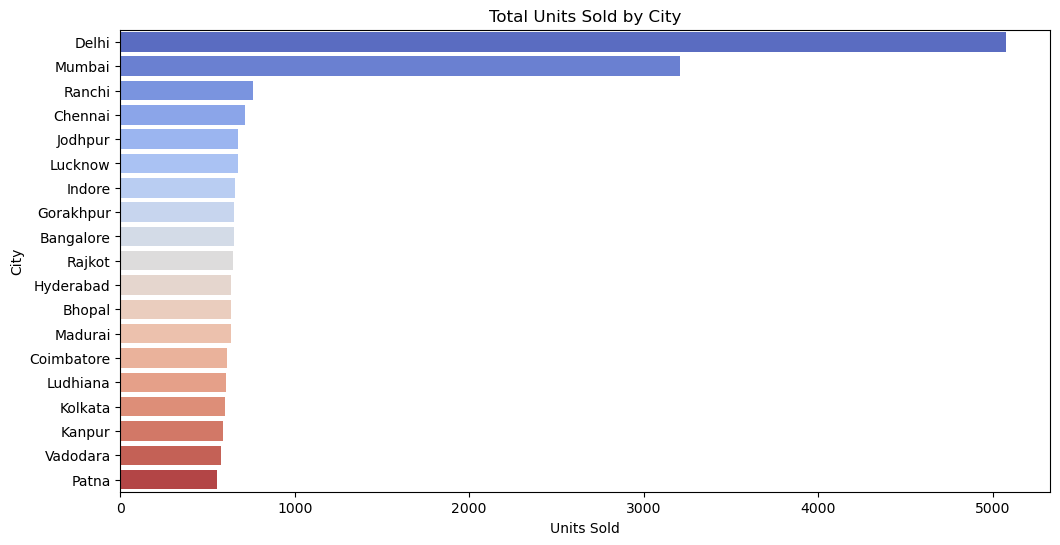

In [75]:
# Plot Units Sold by City
plt.figure(figsize=(12, 6))
sns.barplot(x=units_by_city.values, y=units_by_city.index, palette='coolwarm')
plt.title("Total Units Sold by City")
plt.xlabel("Units Sold")
plt.ylabel("City")
plt.show()

## Analyze Ratings by City

In [77]:
# Average Ratings by City
avg_ratings_by_city = df.groupby('City')['Customer Ratings'].mean().sort_values(ascending=False)
avg_ratings_by_city

City
Indore        3.852713
Vadodara      3.804878
Ludhiana      3.766667
Delhi         3.748016
Rajkot        3.746032
Bhopal        3.733871
Ranchi        3.732026
Madurai       3.715447
Jodhpur       3.708661
Kanpur        3.704000
Lucknow       3.692308
Patna         3.632479
Gorakhpur     3.623077
Mumbai        3.622324
Bangalore     3.617647
Chennai       3.616000
Kolkata       3.604651
Coimbatore    3.593220
Hyderabad     3.572464
Name: Customer Ratings, dtype: float64

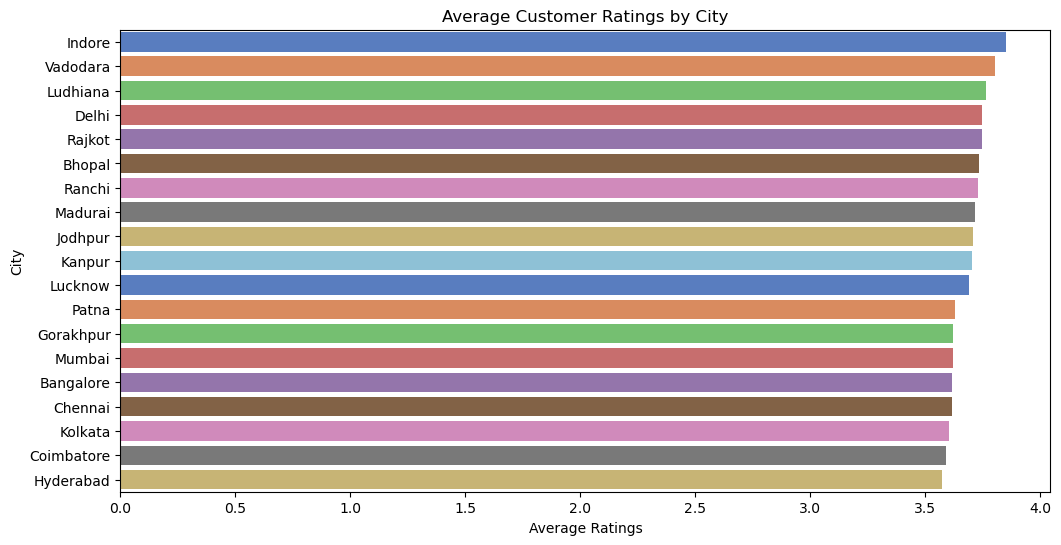

In [78]:
# Plot Average Ratings by City
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings_by_city.values, y=avg_ratings_by_city.index, palette='muted')
plt.title("Average Customer Ratings by City")
plt.xlabel("Average Ratings")
plt.ylabel("City")
plt.show()

## Brand Popularity by City

In [81]:
# Brand Popularity by City
brand_popularity_city = df.pivot_table(index='City', columns='Brand', values='Transaction ID', aggfunc='count', fill_value=0)
brand_popularity_city

Brand,Apple,OnePlus,Samsung,Vivo,Xiaomi
City,,,,,
Bangalore,30,30,23,27,26
Bhopal,34,24,27,24,15
Chennai,21,23,21,30,30
Coimbatore,22,22,29,23,22
Delhi,201,198,197,210,202
Gorakhpur,28,30,25,29,18
Hyderabad,32,29,22,30,25
Indore,24,31,22,35,17
Jodhpur,21,20,27,33,26


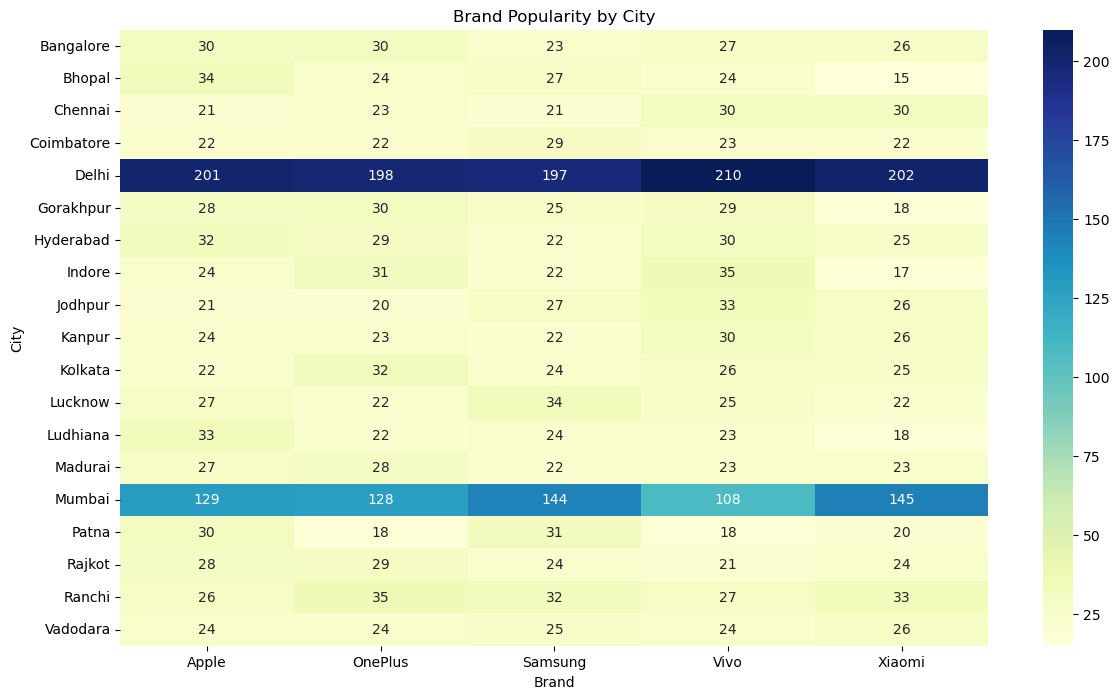

In [82]:
# Heatmap of Brand Popularity
plt.figure(figsize=(14, 8))
sns.heatmap(brand_popularity_city, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Brand Popularity by City")
plt.xlabel("Brand")
plt.ylabel("City")
plt.show()